In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
df = pd.read_csv('data\Air_Quality.csv')

In [3]:
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1836 non-null   int64  
 1   country        1836 non-null   object 
 2   state          1836 non-null   object 
 3   city           1836 non-null   object 
 4   station        1836 non-null   object 
 5   pollutant_id   1836 non-null   object 
 6   last_update    1836 non-null   object 
 7   pollutant_min  1738 non-null   float64
 8   pollutant_max  1738 non-null   float64
 9   pollutant_avg  1738 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 143.6+ KB


In [5]:
df.describe()

,id,pollutant_min,pollutant_max,pollutant_avg
count,1836.000000,1738.000000,1738.000000,1738.000000
mean,918.500000,28.414269,96.873418,54.100690
std,530.151865,34.403811,104.765094,60.824158
min,1.000000,1.000000,1.000000,1.000000
25%,459.750000,5.000000,21.000000,12.000000
50%,918.500000,14.000000,63.000000,31.000000
75%,1377.250000,39.000000,124.000000,70.000000
max,1836.000000,217.000000,500.000000,314.000000


In [6]:
df.duplicated().sum()

0

In [7]:
#listing rows with NH3 as pollutant
nh3_p=df[df['pollutant_id']=='NH3']
nh3_p.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
10,11,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NH3,21-10-2021 01:00:00,2.0,6.0,4.0
17,18,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
24,25,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",NH3,21-10-2021 01:00:00,2.0,9.0,4.0
30,31,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,4.0,2.0


In [8]:
#listing rows with CO as pollutant
co_p=df[df['pollutant_id']=='CO']
co_p.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
5,6,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",CO,21-10-2021 01:00:00,15.0,45.0,32.0
12,13,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",CO,21-10-2021 01:00:00,2.0,52.0,20.0
19,20,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",CO,21-10-2021 01:00:00,39.0,68.0,51.0
26,27,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",CO,21-10-2021 01:00:00,25.0,154.0,46.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0


In [9]:
df['pollutant_id'].value_counts()

CO       273
PM2.5    272
NO2      271
PM10     267
SO2      260
OZONE    258
NH3      235
Name: pollutant_id, dtype: int64

In [10]:
#Finding the sum of pollutant_avg column for each state - NH3
states_nh3=nh3_p.groupby(['state', 'pollutant_id'])['pollutant_avg'].sum().reset_index(name ='total_pollutant_avg')
states_nh3

,state,pollutant_id,total_pollutant_avg
0,Andhra_Pradesh,NH3,14.0
1,Assam,NH3,3.0
2,Bihar,NH3,36.0
3,Chandigarh,NH3,17.0
4,Delhi,NH3,230.0
5,Gujarat,NH3,44.0
6,Haryana,NH3,185.0
7,Jammu_&_Kashmir,NH3,0.0
8,Karnataka,NH3,86.0
9,Kerala,NH3,13.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

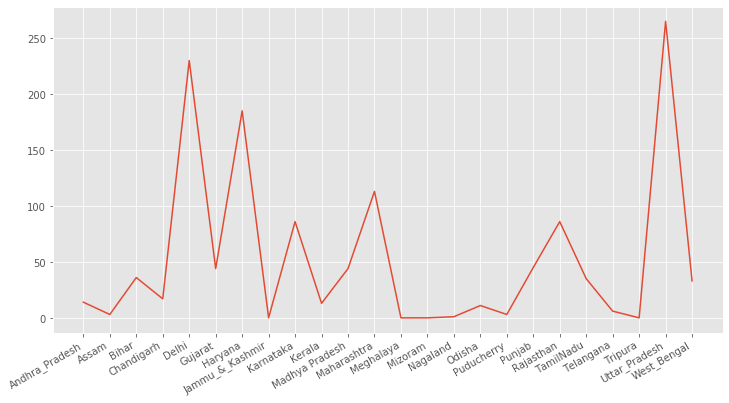

In [11]:
#Plotting the above table
#Highest peak is of UP state
plt.plot(states_nh3.state, states_nh3.total_pollutant_avg)
plt.xticks(rotation=30, ha='right')

In [12]:
#Finding the sum of pollutant_avg column for each state - CO
states_co=co_p.groupby(['state', 'pollutant_id'])['pollutant_avg'].sum().reset_index(name ='total_pollutant_avg')
states_co

,state,pollutant_id,total_pollutant_avg
0,Andhra_Pradesh,CO,149.0
1,Assam,CO,18.0
2,Bihar,CO,526.0
3,Chandigarh,CO,81.0
4,Chhattisgarh,CO,55.0
5,Delhi,CO,1646.0
6,Gujarat,CO,446.0
7,Haryana,CO,1032.0
8,Jammu_&_Kashmir,CO,30.0
9,Karnataka,CO,1021.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

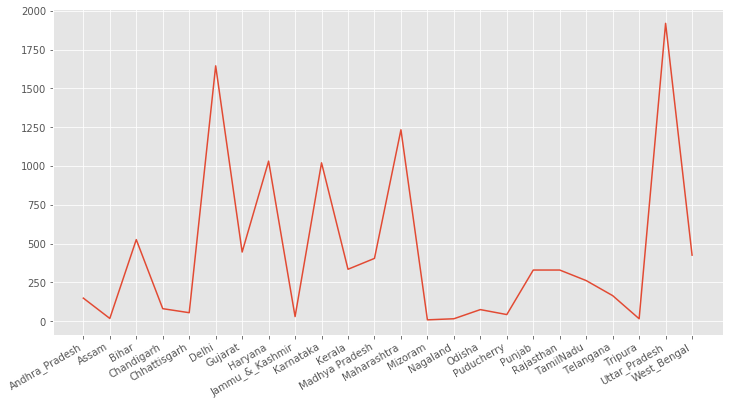

In [13]:
#Plotting the above table
#Highest peak is of UP state
plt.plot(states_co.state, states_co.total_pollutant_avg)
plt.xticks(rotation=30, ha='right')

In [14]:
#Finding the sum of both the pollutants
#Again, UP state has the highest value
sum_of_pollutants = states_nh3['total_pollutant_avg'] + states_co['total_pollutant_avg']
sum_of_pollutants

0      163.0
1       21.0
2      562.0
3       98.0
4      285.0
5     1690.0
6      631.0
7     1032.0
8      116.0
9     1034.0
10     379.0
11     518.0
12    1234.0
13       9.0
14      17.0
15      86.0
16      46.0
17     375.0
18     416.0
19     297.0
20     171.0
21      16.0
22    2185.0
23     459.0
Name: total_pollutant_avg, dtype: float64

In [15]:
states_sum = states_nh3
states_sum['sum_nh3_co']=sum_of_pollutants
states_sum

,state,pollutant_id,total_pollutant_avg,sum_nh3_co
0,Andhra_Pradesh,NH3,14.0,163.0
1,Assam,NH3,3.0,21.0
2,Bihar,NH3,36.0,562.0
3,Chandigarh,NH3,17.0,98.0
4,Delhi,NH3,230.0,285.0
5,Gujarat,NH3,44.0,1690.0
6,Haryana,NH3,185.0,631.0
7,Jammu_&_Kashmir,NH3,0.0,1032.0
8,Karnataka,NH3,86.0,116.0
9,Kerala,NH3,13.0,1034.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

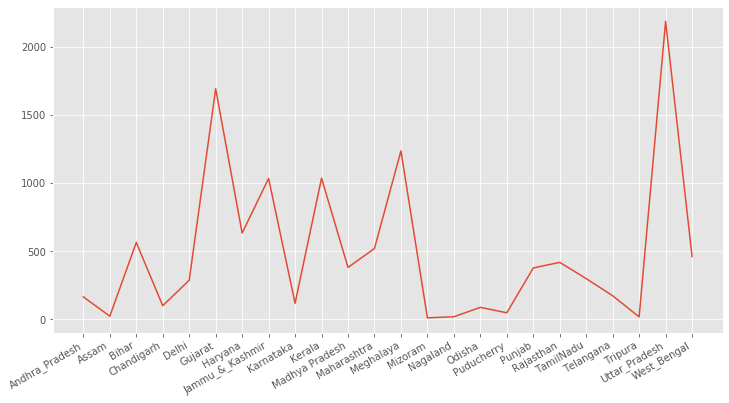

In [16]:
#The state with the highest amount of NH3 and CO pollutants is Uttar Pradesh
plt.plot(states_sum.state, states_sum.sum_nh3_co)
plt.xticks(rotation=30, ha='right')